# Convolutional Neural Networks

## Preliminaries

In this practical session you will implement and train several Convolutional Neural Networks (CNNs) using the Keras framework with a Tensorflow backend. If you are not already familiar with Keras, you can go over the [following tutorial](https://github.com/tueimage/essential-skills/blob/master/keras.md). More detailed information on the different functionalities can be found in the [Keras library documentation](https://keras.io/). 

Note that for this set of exercise CPU-only Tensorflow, which you should already have installed, is sufficient (i.e. GPU-support is not required but it will make your experiments run faster). 

You are also required to use the `gryds` package for data augmentation that you can install directly from git: `pip install git+https://github.com/tueimage/gryds/`.

You also have to install the Keras deep learning framework (if you have not done so already) by running `conda install keras`. Note that there are two implementations of Keras, one from https://keras.io/ and another one that ships with Tensorflow. Here we use the former. 

## MNIST
We will first train a simple CNN to classify handwritten digits using the MNIST dataset. This dataset is often referred to as the "Hello world!" example of deep learning because it can be used to quickly illustrate a small neural network in action (and obtain a decent classification accuracy in the process). More information on it can be found [here](http://yann.lecun.com/exdb/mnist/).

First, let's load the dataset and visualize some images.

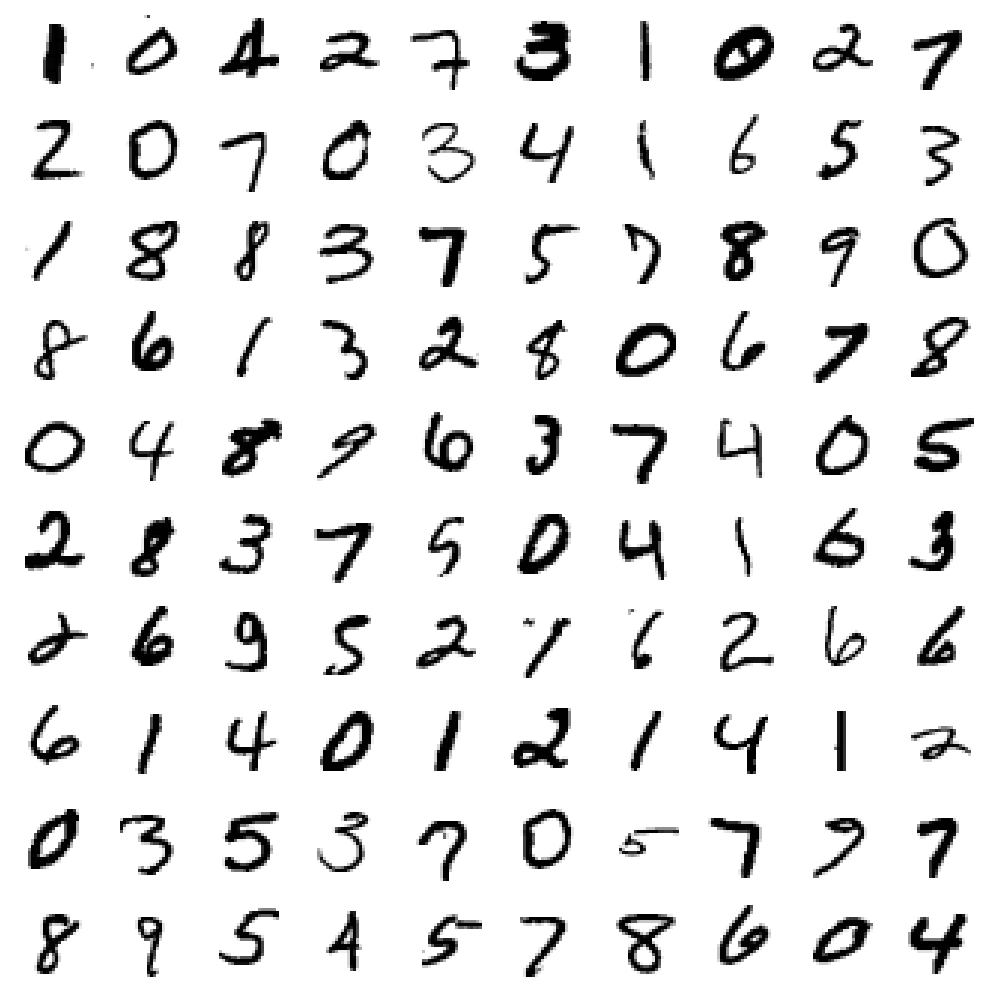

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

# load the MNIST the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# scale the image intensities to the 0-1 range
x_train = (x_train / 255.0).astype(np.float32)
x_test = (x_test / 255.0).astype(np.float32)

# convert the data to channel-last
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# convert the labels to one-hot encoded
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

def plot_images(images, dim=(10, 10), figsize=(10, 10), title=''):
    
    plt.figure(figsize=figsize)
    
    for i in range(images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    
    plt.tight_layout()
    plt.suptitle(title)
    plt.show()
    
plot_images(x_train[np.random.randint(0, x_train.shape[0], size=100)].reshape(100, 28, 28))

The MNIST classification task is quite simple: given an image, predict the digit that it contains. Thus, this is a 10-class classification problem.

Let's define a simple network for the handwritten digit classification.

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
#Convolutional layer of 32 kernels of size 3x3. ReLU activation is used. Images have 28x28 pixels and single color channer (grayscaled)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

#Convolutional layer of 64 kernels of size 3x3. ReLU activation is used.
model.add(Conv2D(64, (3, 3), activation='relu'))

#Max-pooling: maximum value from 2x2 grid of values in each feature map; reduces spatial dimensions
model.add(MaxPooling2D(pool_size=(2, 2)))

#Dropout: regularization technique, prevents the network from relying too heavily on any single feature/neuron during training, promoting better generalization.
#randomly sets a fraction of the input units to zero during training 
#(specified by the dropout rate, which is 0.25 in this case) 
model.add(Dropout(0.25))

#Flatten: convert the 2D feature maps into 1D
model.add(Flatten())

#Dense is here a fully connected layer of 128 neurons with ReLU activation
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

#here the 10 classification classes are used with each neuron a probability of the class outcome
model.add(Dense(10, activation='softmax')) #softmax converts the raw output scores to probability values

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

Compile and train the network (note that this could take a while).

In [4]:
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

#Compiling the model to specifying how the model should learn and adapt during training
#loss = loss function for minimizing training data, 
#       categorical_crossentropy = measures the dissimilarity between the predicted probability distribution and the true distribution of class labels
#optimization = optimization algorithm to update the weights during training
#               Adam adapts the learning rate during training to converge faster and more robustly
model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 [==============================] - 106s 219ms/step - loss: 0.2407 - accuracy: 0.9257 - val_loss: 0.0506 - val_accuracy: 0.9836
Epoch 2/12
469/469 [==============================] - 99s 212ms/step - loss: 0.0842 - accuracy: 0.9747 - val_loss: 0.0368 - val_accuracy: 0.9877
Epoch 3/12
469/469 [==============================] - 84s 178ms/step - loss: 0.0630 - accuracy: 0.9813 - val_loss: 0.0320 - val_accuracy: 0.9897
Epoch 4/12
469/469 [==============================] - 81s 172ms/step - loss: 0.0526 - accuracy: 0.9839 - val_loss: 0.0277 - val_accuracy: 0.9913
Epoch 5/12
469/469 [==============================] - 86s 184ms/step - loss: 0.0433 - accuracy: 0.9866 - val_loss: 0.0287 - val_accuracy: 0.9904
Epoch 6/12
469/469 [==============================] - 80s 170ms/step - loss: 0.0408 - accuracy: 0.9877 - val_loss: 0.0276 - val_accuracy: 0.9904
Epoch 7/12
469/469 [==============================] - 81s 173ms/step - loss: 0.0335 - accuracy: 0.9895 - val_loss: 0.0273 - val_a

Now that the model is trained, we can evaluate its performance on the independent test dataset.

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.029201345518231392
Test accuracy: 0.9919000267982483


## U-Net
The U-Net convolutional neural network architecture was first developed for biomedical image segmentation and is to this day one of the most widely used methods for image segmentation. The details of the architecture can be found in the [original paper](https://arxiv.org/abs/1505.04597). In this practical we will build and train a U-Net network that is able to segment blood vessels in retinal images. 

### Loading and visualizing the data
The data for this task is taken from the [DRIVE](https://www.isi.uu.nl/Research/Databases/DRIVE/index.php) database. It consists of photographs of the retina, where the goal is to segment the blood vessels within. The dataset has a total of 40 photographs, divided in 20 images for training and 20 for testing. The images corresponding to the DRIVE test set can be found [here](https://www.dropbox.com/s/zk51wgupimw7jd9/DRIVE.zip?dl=0).

Let's load the training set and visualize an image with the corresponding blood vessel segmentation. For training we will divide the data in a training and a validation set to monitor the model during training.

(20, 584, 565, 3)


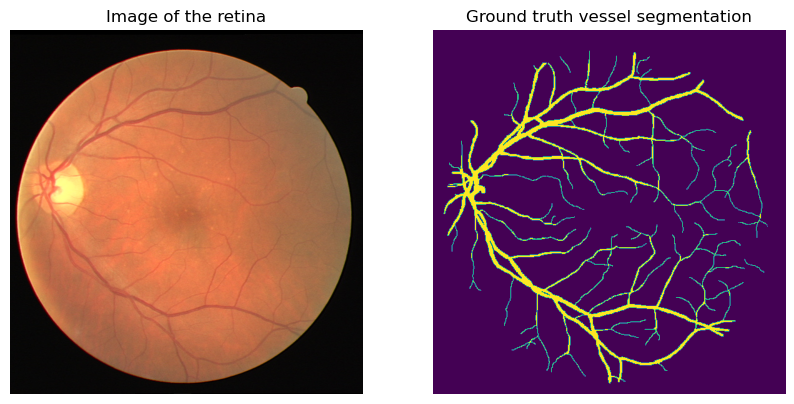

(16, 584, 565, 3)
(16, 584, 565, 1)
(16, 584, 565, 1)
(4, 584, 565, 3)
(4, 584, 565, 1)
(4, 584, 565, 1)


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from glob import glob

import sys
sys.path.append('code')

from unet_utils import load_data

import sys
# location of the DRIVE dataset
data_folder = sys.path[0] + "\data\DRIVE"
train_paths = glob(data_folder + r'\training\images\*.tif')

images, masks, segmentations = load_data(train_paths)

# print the shape of image dataset
print(images.shape)

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.title("Image of the retina")
plt.axis('off')
plt.imshow(images[0])

plt.subplot(1, 2, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(segmentations[0][:, :, 0])

plt.show()

# divide in training and validation
train_images, val_images, train_masks, val_masks, train_segmentations, val_segmentations = train_test_split(
    images, masks, segmentations, test_size=0.2, random_state=7)

# print the shape of the training and valudation datasets
print(train_images.shape)
print(train_masks.shape)
print(train_segmentations.shape)
print(val_images.shape)
print(val_masks.shape)
print(val_segmentations.shape)

### Training a U-Net model

You are already provided with implementation of the U-Net architecture in `unet_model.py`. This is a modular implementation and can be used to generate U-Net architectures with a variety of hyperparameters such as depth and number of feature maps. Before using the model, examine the code and documentation and make sure that you understand all the details.

We will train a U-Net model using smaller patches extracted from the training images. Training the images on smaller patches requires less computation power and results in a more varied training dataset (it has the effect of data augmentation by image translation). Because a U-Net is a fully convolutional network it can be evaluated on inputs of different size (the output size will change according to the input size). Thus, although the model will be trained on smaller patches it can still be used to segment larger images with one pass through the model. 


(16, 32, 32, 3)


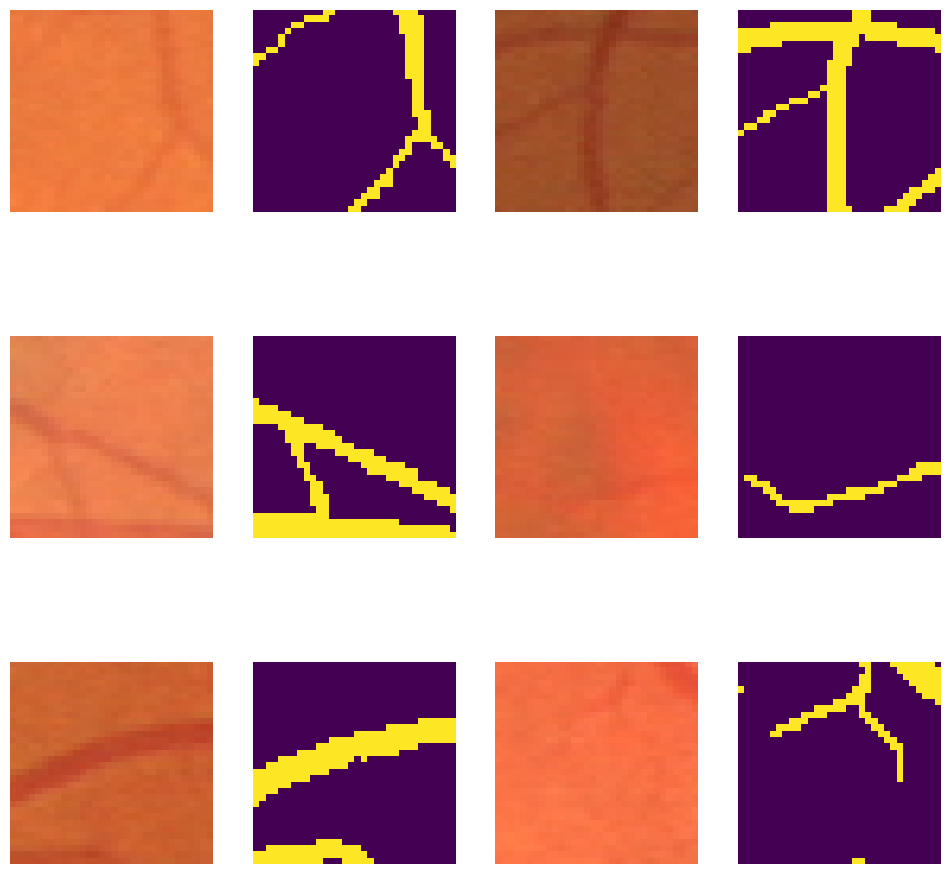

In [3]:
from unet_utils import extract_patches, preprocessing

# work with 32x32 patches
patch_size = (32, 32)

# 200 patches per image
patches_per_im = 200

# visualize a couple of patches as a visual check
patches, patches_segmentations = extract_patches(train_images, train_segmentations, patch_size, patches_per_im=1, seed=7)

print(patches.shape)

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 12))

for i in range(0, 3):
    axes[i, 0].axis('off')
    axes[i, 0].imshow(patches[i])
    axes[i, 1].axis('off')
    axes[i, 1].imshow(patches_segmentations[i][:, :, 0])
    axes[i, 2].axis('off')
    axes[i, 2].imshow(patches[i+5])
    axes[i, 3].axis('off')
    axes[i, 3].imshow(patches_segmentations[i+5][:, :, 0])

plt.show()

In [4]:
# pad the validation data to fit the U-Net model
# images of shape (584, 565) shape result in concatenation error due to the odd number of columns

print("Old shape:", val_images.shape)

val_images, val_masks, val_segmentations = preprocessing(
    val_images, 
    val_masks, 
    val_segmentations, 
    desired_shape=(584, 584))
    
print("New shape:", val_images.shape)

Old shape: (4, 584, 565, 3)
New shape: (4, 584, 584, 3)


In [5]:
import os
import sys
sys.path.append('code')
from unet_model import unet
from unet_utils import datagenerator
from keras.models import load_model
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# use a single training image, to better demonstrate the effects of data augmentation
X_train, y_train = np.expand_dims(train_images[0], axis=0), np.expand_dims(train_segmentations[0], axis=0)

print(X_train.shape)
print(y_train.shape)

# hyperparameters
depth = 3
channels = 32
use_batchnorm = True
batch_size = 64
epochs = 250
steps_per_epoch = int(np.ceil((patches_per_im * len(train_images)) / batch_size))

# work with 32x32 patches
patch_size = (32, 32)
# 200 patches per image
patches_per_im = 200

# initialize model
model = unet(input_shape=(None, None, 3), depth=depth, channels=channels, batchnorm=use_batchnorm)

# print a summary of the model
# model.summary(line_length=120)

# compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# stop the training if the validation loss does not increase for 15 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# train the model with the data generator, and save the training history
history = model.fit_generator(datagenerator(X_train, y_train, patch_size, patches_per_im, batch_size),
                              validation_data=(val_images, val_segmentations),
                              steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=2,
                              callbacks=[early_stopping])

(1, 584, 565, 3)
(1, 584, 565, 1)
Epoch 1/250


C:\Users\s163666\AppData\Local\Temp\ipykernel_21480\3387162713.py:42: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagenerator(X_train, y_train, patch_size, patches_per_im, batch_size),


50/50 - 51s - loss: 0.5230 - accuracy: 0.8255 - val_loss: 0.4826 - val_accuracy: 0.9211 - 51s/epoch - 1s/step
Epoch 2/250
50/50 - 42s - loss: 0.3194 - accuracy: 0.9484 - val_loss: 3.7536 - val_accuracy: 0.0964 - 42s/epoch - 836ms/step
Epoch 3/250
50/50 - 43s - loss: 0.2321 - accuracy: 0.9560 - val_loss: 0.3320 - val_accuracy: 0.9198 - 43s/epoch - 862ms/step
Epoch 4/250
50/50 - 47s - loss: 0.2095 - accuracy: 0.9506 - val_loss: 0.2897 - val_accuracy: 0.9210 - 47s/epoch - 939ms/step
Epoch 5/250
50/50 - 44s - loss: 0.1721 - accuracy: 0.9558 - val_loss: 0.2688 - val_accuracy: 0.9209 - 44s/epoch - 890ms/step
Epoch 6/250
50/50 - 44s - loss: 0.1384 - accuracy: 0.9604 - val_loss: 0.3065 - val_accuracy: 0.9209 - 44s/epoch - 876ms/step
Epoch 7/250
50/50 - 46s - loss: 0.1329 - accuracy: 0.9595 - val_loss: 0.2364 - val_accuracy: 0.9176 - 46s/epoch - 928ms/step
Epoch 8/250
50/50 - 43s - loss: 0.1233 - accuracy: 0.9617 - val_loss: 0.2243 - val_accuracy: 0.9273 - 43s/epoch - 863ms/step
Epoch 9/250
50/

### Visualizing the segmentation results

1/1 [==============================] - 1s 1s/step


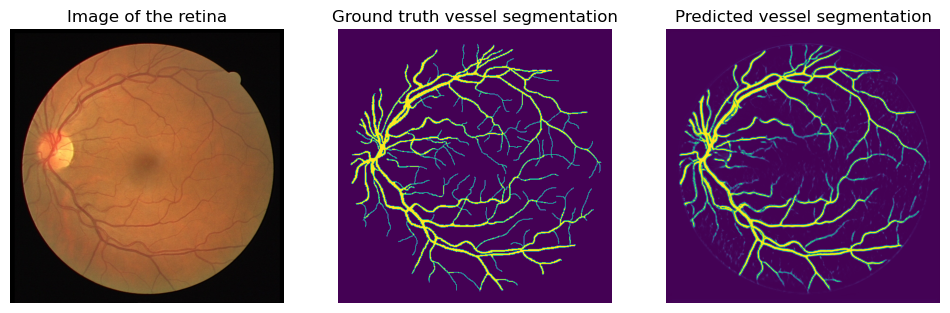

In [7]:
# run the model on one test image and show the results
from unet_utils import preprocessing

# test data paths
impaths_test = glob(data_folder + r'\test\images\*.tif')

# load data
test_images, test_masks, test_segmentations = load_data(impaths_test, test=True)

# pad the data to fit the U-Net model
test_images, test_masks, test_segmentations = preprocessing(test_images, test_masks, test_segmentations, 
                                                            desired_shape=(584, 584))

# use a single image to evaluate
X_test, y_test = np.expand_dims(test_images[0], axis=0), np.expand_dims(test_masks[0], axis=0)

# predict test samples
test_prediction = model.predict(X_test, batch_size=4)

# visualize the test result
plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.title("Image of the retina")
plt.axis('off')
plt.imshow(test_images[0])

plt.subplot(1, 3, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(test_segmentations[0][:, :, 0])

plt.subplot(1, 3, 3)
plt.title("Predicted vessel segmentation")
plt.axis('off')
plt.imshow(test_prediction[0, :, :, 0])

plt.show()

# Exercises

## Number of parameters

The first convolutional layer in the MNIST example has 320 parameters. The first fully connected layer has 1179,776 parameters. What do these parameters correspond to? 

<font color='#770a0a'>What is the general expression for the number of parameters of 1) a convolutional layer and 2) a fully-connected layer?</font>



## Fully-convolutional MNIST model

Modify the model in the MNIST example in such a way that it only contains convolutional layers while keeping the same number of parameters. If you do the modification correctly, the two models will have the same behaviour (i.e. they will represent the same model, only with different implementation). Show this experimentally.

## U-Net architecture

<font color='#770a0a'> What is the role of the skip connections in the U-Net neural network architecture? Will it be possible to train the exact same architecture with the skip connections omitted? If yes, what would be the expected result? If no, what would be the cause of the error?</font>

<font color='#808080'><i> The skip connections are connecting corresponding layers of the encoder to the decoder path of the U-net. In that way it is preserving information that is lost within the encoder path. Omitting the skip connections will therefore have an impact on the models performance of the segmentation task. When the decoder upsamples the feature maps, it won't be able to recover the image information that is lost during downsampling in the encoder path. Therefore omitting the skip connections is possible but undesireble for segmentation tasks, since a worse performance will be expected. </i> </font>


## Data augmentation

<font color='#770a0a'>Why does data augmentation result in less overfitting? Can data augmentation be applied to the test samples? If yes, towards what goal? If no, what is preventing that?</font>


<font color='#808080'><i> 
With data augmentation you create new plausible samples by applying various transfomations or modifications to the existing data. Thereby you increase the diversity of the training data without the need of extra real data, which can be rare in the medical world.
</i> </font>

<font color='#808080'><i>
The model could have performed well on the old training dataset and poorly on newly unseen data. And with data augmentation, the model will be trained on more variations of the real data and therefore the performance of the model will be improved on unseen data, thus data augmentation results in less overfitting. 
</i> </font>

<font color='#808080'><i>
The test data should be a representation of the real data to keep the realness of the evaluation of the model. By applying data augmentation to the test data it can result into a mislead of the evaluation scores.
</i> </font>

Implement random brightness augmentation of the image data by adding a random offset to the image intensity before passing them trough the network at training time. Train a model with random brightness augmentation and compare it to the baseline above.

(2, 584, 565, 3)
(1, 584, 565, 1)
Epoch 1/250


C:\Users\s163666\AppData\Local\Temp\ipykernel_21480\3046060673.py:60: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagenerator(X_train, y_train, patch_size, patches_per_im, batch_size),


50/50 - 53s - loss: 0.6367 - accuracy: 0.7239 - val_loss: 0.5204 - val_accuracy: 0.9211 - 53s/epoch - 1s/step
Epoch 2/250
50/50 - 48s - loss: 0.4547 - accuracy: 0.9258 - val_loss: 0.3711 - val_accuracy: 0.9211 - 48s/epoch - 956ms/step
Epoch 3/250
50/50 - 47s - loss: 0.3124 - accuracy: 0.9579 - val_loss: 0.4180 - val_accuracy: 0.8970 - 47s/epoch - 938ms/step
Epoch 4/250
50/50 - 47s - loss: 0.2038 - accuracy: 0.9734 - val_loss: 0.5287 - val_accuracy: 0.8436 - 47s/epoch - 932ms/step
Epoch 5/250
50/50 - 47s - loss: 0.1426 - accuracy: 0.9773 - val_loss: 0.3035 - val_accuracy: 0.9146 - 47s/epoch - 937ms/step
Epoch 6/250
50/50 - 49s - loss: 0.1108 - accuracy: 0.9790 - val_loss: 0.4322 - val_accuracy: 0.8628 - 49s/epoch - 974ms/step
Epoch 7/250
50/50 - 49s - loss: 0.0941 - accuracy: 0.9792 - val_loss: 0.2933 - val_accuracy: 0.9212 - 49s/epoch - 977ms/step
Epoch 8/250
50/50 - 51s - loss: 0.0846 - accuracy: 0.9789 - val_loss: 0.2889 - val_accuracy: 0.9192 - 51s/epoch - 1s/step
Epoch 9/250
50/50 

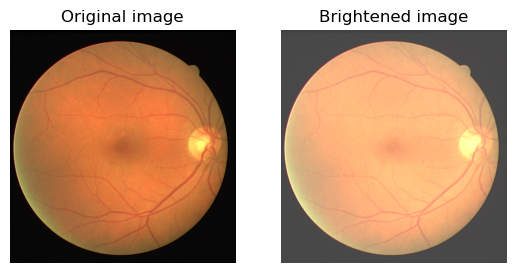

In [31]:
import random

#------------------------------------------------------------------------#
# Add random brightness to an image for data augmentation                #
#------------------------------------------------------------------------#

#pick a random offset between 0.1 and 0.9
random_brightness_offset = random.uniform(0.1,0.9)

#use numpy clip to add the offset to the image
brighten_image = np.clip(train_images[0] + random_brightness_offset,0,1)

#plotting the original image vs the brightened image for visualization
plt.subplot(1, 2, 1)
plt.title("Original image")
plt.axis('off')
plt.imshow(train_images[0])
plt.subplot(1, 2, 2)
plt.title("Brightened image")
plt.axis('off')
plt.imshow(brighten_image)

#---------------------------------------------------------------------------------------#
# Train the model using previous code and implement the brightened image to the X_train #
#---------------------------------------------------------------------------------------#
X_train_images = [train_images[0], brighten_image]

# use a single training image, to better demonstrate the effects of data augmentation
X_train, y_train = (np.expand_dims(X_train_images, axis=0))[0], np.expand_dims(train_segmentations[0], axis=0)

print(X_train.shape)
print(y_train.shape)

# hyperparameters
depth = 3
channels = 32
use_batchnorm = True
batch_size = 64
epochs = 250
steps_per_epoch = int(np.ceil((patches_per_im * len(train_images)) / batch_size))

# work with 32x32 patches
patch_size = (32, 32)
# 200 patches per image
patches_per_im = 200

# initialize model
model = unet(input_shape=(None, None, 3), depth=depth, channels=channels, batchnorm=use_batchnorm)

# print a summary of the model
# model.summary(line_length=120)

# compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# stop the training if the validation loss does not increase for 15 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# train the model with the data generator, and save the training history
history = model.fit_generator(datagenerator(X_train, y_train, patch_size, patches_per_im, batch_size),
                              validation_data=(val_images, val_segmentations),
                              steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=2,
                              callbacks=[early_stopping])


1/1 [==============================] - 1s 1s/step


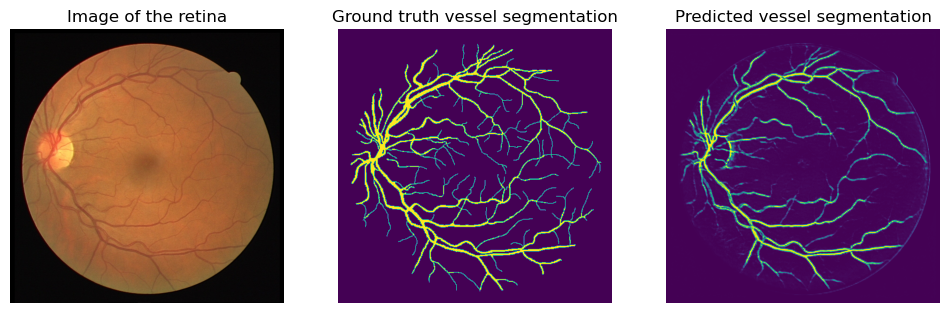

In [34]:
# run the model on one test image and show the results
from unet_utils import preprocessing

# test data paths
impaths_test = glob(data_folder + r'\test\images\*.tif')

# load data
test_images, test_masks, test_segmentations = load_data(impaths_test, test=True)

# pad the data to fit the U-Net model
test_images, test_masks, test_segmentations = preprocessing(test_images, test_masks, test_segmentations, 
                                                            desired_shape=(584, 584))

# use a single image to evaluate
X_test, y_test = np.expand_dims(test_images[0], axis=0), np.expand_dims(test_masks[0], axis=0)

# predict test samples
test_prediction = model.predict(X_test, batch_size=4)

# visualize the test result
plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.title("Image of the retina")
plt.axis('off')
plt.imshow(test_images[0])

plt.subplot(1, 3, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(test_segmentations[0][:, :, 0])

plt.subplot(1, 3, 3)
plt.title("Predicted vessel segmentation")
plt.axis('off')
plt.imshow(test_prediction[0, :, :, 0])

plt.show()

<font color='#808080'><i>
Baseline model: <br>
loss: 0.0949 - accuracy: 0.9654 - val_loss: 0.1585 - val_accuracy: 0.9458
</i> </font>

<font color='#808080'><i>
Using brightness augmentation: <br>
loss: 0.0544 - accuracy: 0.9828 - val_loss: 0.1339 - val_accuracy: 0.9537
</i> </font>

Implement data augmentation procedure that in addition to brightness augmentation also performs b-spline geometric augmentation using the gryds package (you can look at the documentation of the package for an example on how to do that). Compare the new model with the baseline and the model that only performs brightness augmentation.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2, 584, 565, 3)
(1, 584, 565, 1)
Epoch 1/250


C:\Users\s163666\AppData\Local\Temp\ipykernel_21480\316734820.py:101: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagenerator(X_train, y_train, patch_size, patches_per_im, batch_size),


50/50 - 56s - loss: 0.6203 - accuracy: 0.7540 - val_loss: 0.5471 - val_accuracy: 0.9211 - 56s/epoch - 1s/step
Epoch 2/250
50/50 - 46s - loss: 0.4122 - accuracy: 0.9435 - val_loss: 0.3661 - val_accuracy: 0.9211 - 46s/epoch - 929ms/step
Epoch 3/250
50/50 - 46s - loss: 0.2942 - accuracy: 0.9661 - val_loss: 0.3002 - val_accuracy: 0.9211 - 46s/epoch - 926ms/step
Epoch 4/250
50/50 - 47s - loss: 0.1913 - accuracy: 0.9760 - val_loss: 0.2911 - val_accuracy: 0.9211 - 47s/epoch - 934ms/step
Epoch 5/250
50/50 - 46s - loss: 0.1344 - accuracy: 0.9795 - val_loss: 0.2682 - val_accuracy: 0.9205 - 46s/epoch - 920ms/step
Epoch 6/250
50/50 - 46s - loss: 0.1082 - accuracy: 0.9797 - val_loss: 0.2538 - val_accuracy: 0.9218 - 46s/epoch - 923ms/step
Epoch 7/250
50/50 - 46s - loss: 0.0943 - accuracy: 0.9790 - val_loss: 0.3229 - val_accuracy: 0.8698 - 46s/epoch - 922ms/step
Epoch 8/250
50/50 - 46s - loss: 0.0826 - accuracy: 0.9794 - val_loss: 0.7524 - val_accuracy: 0.7771 - 46s/epoch - 929ms/step
Epoch 9/250
50/

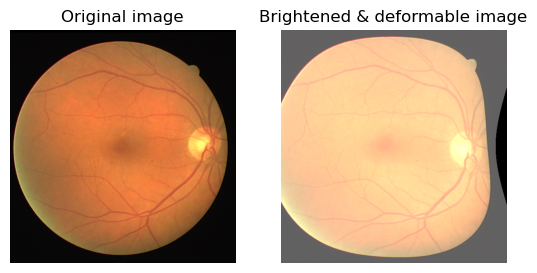

In [68]:
import random
import gryds

#------------------------------------------------------------------------#
# Add random brightness to an image                                      #
#------------------------------------------------------------------------#

#pick a random offset between 0.1 and 0.9
random_brightness_offset = random.uniform(0.1,0.9)

#use numpy clip to add the offset to the image
brighten_image = np.clip(train_images[0] + random_brightness_offset,0,1)

#------------------------------------------------------------------------#
# Perform b-spline transformation to the image                           #
# [the gryds package was used for this]                                  #
#------------------------------------------------------------------------#

#define a b-spline grid, with displacement in x and y direction
disp_x = np.array([
    [0.07, 0.02, 0.04],
    [-0.04, 0.01, -0.04],
    [-0.06, -0.01, -0.04]
])
disp_y = np.array([
    [0.02, -0.03, -0.05],
    [0.07, 0.03, 0.05],
    [0.02, -0.04, -0.05]
])
b_spline_grid = [disp_x,disp_y]

#derive the number of color channels of the image
channels = brighten_image.shape[-1]

#create an empty array to story the transformation per channel
transformed_image = np.zeros_like(brighten_image)

for i in range(channels): #perform for each channel a b-spline transformation
    #extract 1 color channel
    image_channel = brighten_image[:,:,i]
    
    # Define a B-spline transformation object
    bspline = gryds.BSplineTransformation(b_spline_grid)

    # Define an interpolator object for the image:
    interpolator = gryds.Interpolator(image_channel)

    # Transforming the image by applying the B-spline to the grid first
    transformed_channel = interpolator.transform(bspline)

    # Store each transformed_channel to the transformed_image
    transformed_image[:,:,i] = transformed_channel

#plotting the original image vs the brightened+deformable transformed image for visualization
plt.subplot(1, 2, 1)
plt.title("Original image")
plt.axis('off')
plt.imshow(train_images[0])
plt.subplot(1, 2, 2)
plt.title("Brightened & deformable image")
plt.axis('off')
plt.imshow(transformed_image)

#----------------------------------------------------------------------------------------#
# Train the model using previous code and implement the transformed_image to the X_train #
#----------------------------------------------------------------------------------------#
X_train_images = [train_images[0], transformed_image]

# use a single training image, to better demonstrate the effects of data augmentation
X_train, y_train = (np.expand_dims(X_train_images, axis=0))[0], np.expand_dims(train_segmentations[0], axis=0)

print(X_train.shape)
print(y_train.shape)

# hyperparameters
depth = 3
channels = 32
use_batchnorm = True
batch_size = 64
epochs = 250
steps_per_epoch = int(np.ceil((patches_per_im * len(train_images)) / batch_size))

# work with 32x32 patches
patch_size = (32, 32)
# 200 patches per image
patches_per_im = 200

# initialize model
model = unet(input_shape=(None, None, 3), depth=depth, channels=channels, batchnorm=use_batchnorm)

# print a summary of the model
# model.summary(line_length=120)

# compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# stop the training if the validation loss does not increase for 15 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# train the model with the data generator, and save the training history
history = model.fit_generator(datagenerator(X_train, y_train, patch_size, patches_per_im, batch_size),
                              validation_data=(val_images, val_segmentations),
                              steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=2,
                              callbacks=[early_stopping])


<font color='#808080'><i>
Baseline model: <br>
loss: 0.0949 - accuracy: 0.9654 - val_loss: 0.1585 - val_accuracy: 0.9458
</i> </font>

<font color='#808080'><i>
Using brightness augmentation: <br>
loss: 0.0544 - accuracy: 0.9828 - val_loss: 0.1339 - val_accuracy: 0.9537
</i> </font>

<font color='#808080'><i>
Using brightness + b-spline deformation augmentation: <br>
loss: 0.0566 - accuracy: 0.9824 - val_loss: 0.1584 - val_accuracy: 0.9480
</i> </font>


1/1 [==============================] - 1s 1s/step


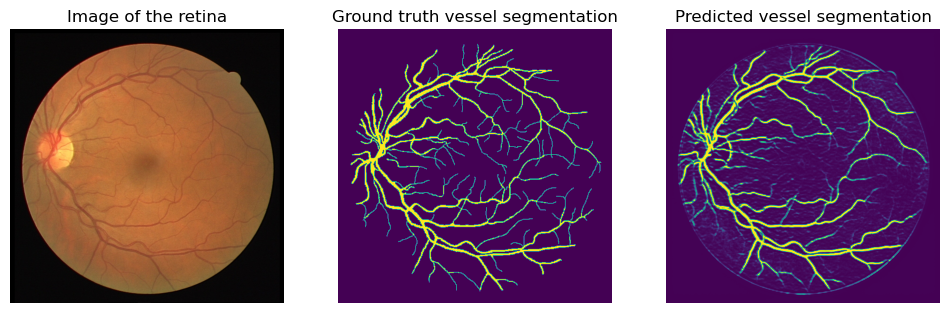

In [69]:
# run the model on one test image and show the results
from unet_utils import preprocessing

# test data paths
impaths_test = glob(data_folder + r'\test\images\*.tif')

# load data
test_images, test_masks, test_segmentations = load_data(impaths_test, test=True)

# pad the data to fit the U-Net model
test_images, test_masks, test_segmentations = preprocessing(test_images, test_masks, test_segmentations, 
                                                            desired_shape=(584, 584))

# use a single image to evaluate
X_test, y_test = np.expand_dims(test_images[0], axis=0), np.expand_dims(test_masks[0], axis=0)

# predict test samples
test_prediction = model.predict(X_test, batch_size=4)

# visualize the test result
plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.title("Image of the retina")
plt.axis('off')
plt.imshow(test_images[0])

plt.subplot(1, 3, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(test_segmentations[0][:, :, 0])

plt.subplot(1, 3, 3)
plt.title("Predicted vessel segmentation")
plt.axis('off')
plt.imshow(test_prediction[0, :, :, 0])

plt.show()